#question 1

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

folder structure



In [ ]:
folders = ["data/raw", "data/processed", "results/visualizations", "results/reports"]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

Create Database

In [ ]:
frailty_data = {
    "Height": [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    "Weight": [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    "Age": [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    "Grip Strength": [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    "Frailty": ["N", "N", "N", "Y", "Y", "N", "Y", "Y", "N", "N"]
}

df = pd.DataFrame(frailty_data)
print(df)

   Height  Weight  Age  Grip Strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    66.8     120   39             31       N


Save Raw Data

In [ ]:
df.to_csv("data/raw/frailty_data.csv", index=False)


Data Processing

convert categorical to binary where (0 = NO, 1=YES)

In [ ]:
df["Frailty"] == df["Frailty"].map({"NO": 0, "YES": 1})


,Frailty
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Save Processed Data

In [ ]:
df.to_csv("data/processed/frailty_data_processed.csv", index=False)


Check missing values

In [ ]:
print("missing values:\n", df.isnull().sum())

missing values:
 Height           0
Weight           0
Age              0
Grip Strength    0
Frailty          0
dtype: int64


summary statistics

In [ ]:
df.describe
print(df)

   Height  Weight  Age  Grip Strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    66.8     120   39             31       N


Scatter plot grip strength vs age

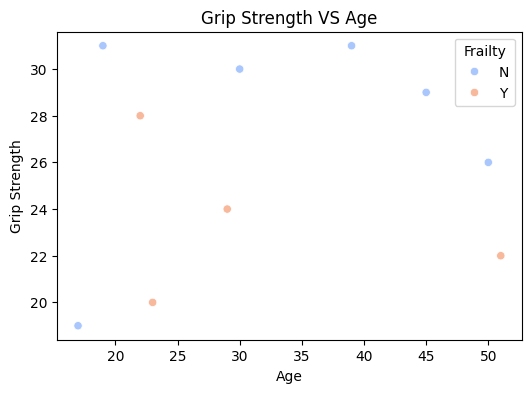

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Age"], y=df["Grip Strength"], hue=df["Frailty"], palette="coolwarm")
plt.title ("Grip Strength VS Age")
plt.xlabel("Age")
plt.ylabel("Grip Strength")
plt.show()

box plot

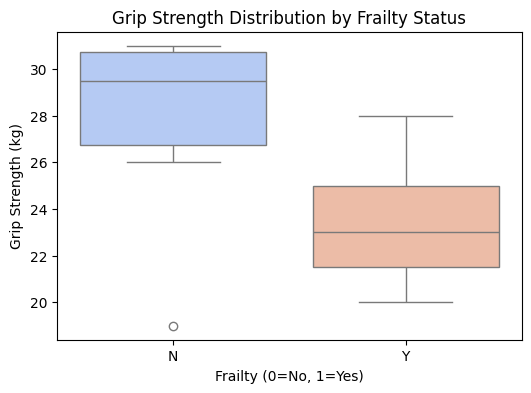

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x="Frailty", y="Grip Strength", data=df, hue="Frailty", palette="coolwarm", legend=False)

plt.xlabel("Frailty (0=No, 1=Yes)")
plt.ylabel("Grip Strength (kg)")
plt.title("Grip Strength Distribution by Frailty Status")
plt.savefig("results/visualizations/grip_strength_boxplot.png")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
print(df.columns)

Index(['Height', 'Weight', 'Age', 'Grip Strength', 'Frailty'], dtype='object')


In [ ]:
print(df.head())

   Height  Weight  Age  Grip Strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y


analysis

In [ ]:
print(df.columns)

Index(['Height', 'Weight', 'Age', 'Grip Strength', 'Frailty'], dtype='object')


In [ ]:
group_frail = df[df["Frailty"] == 1]["Grip Strength"]
group_non_frail = df[df["Frailty"] == 0]["Grip Strength"]


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df = pd.read_csv("data/processed/frailty_data_processed.csv")
print(df.head())

   Height  Weight  Age  Grip Strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y


In [ ]:
df.rename(columns={" Frailty ": "Frailty"}, inplace=True)

In [ ]:
df["Frailty"] = df["Frailty"].map({"Y": 1, "N": 0})

In [ ]:
df.rename(columns={"Grip strength": "Grip Strength"}, inplace=True)

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
group_frail = df[df["frailty"] == 1]["grip_strength"]
group_non_frail = df[df["frailty"] == 0]["grip_strength"]

In [ ]:
from scipy import stats

In [ ]:
df = pd.read_csv("data/processed/frailty_data_processed.csv")

# Debug: Check column names
print("Column names:", df.columns)

# Clean column names
df.columns = df.columns.str.strip()  # Remove spaces
df.rename(columns={"Grip strength": "Grip Strength"}, inplace=True)

# Convert Frailty to numeric
df["Frailty"] = df["Frailty"].map({"Y": 1, "N": 0})

# Perform t-test
group_frail = df[df["Frailty"] == 1]["Grip Strength"]
group_non_frail = df[df["Frailty"] == 0]["Grip Strength"]

t_stat, p_value = stats.ttest_ind(group_frail, group_non_frail, equal_var=False, nan_policy='omit')

print(f"T-Test Results (Grip Strength by Frailty):")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

Column names: Index(['Height', 'Weight', 'Age', 'Grip Strength', 'Frailty'], dtype='object')
T-Test Results (Grip Strength by Frailty):
T-Statistic: -1.6349999934600006
P-Value: 0.1415730416628566


#QUESTION 2

# LOADstudent data

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("StudentsPerformance.csv")
df.head()


Saving StudentsPerformance.csv to StudentsPerformance (1).csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Check for missing values

In [33]:
df.dropna(inplace=True)

# Convert categorical columns if needed

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns
df["gender"] = label_encoder.fit_transform(df["gender"])
df["test preparation course"] = label_encoder.fit_transform(df["test preparation course"])
df["lunch"] = label_encoder.fit_transform(df["lunch"])

# Display updated dataframe
print(df.head())

   gender race/ethnicity parental level of education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test preparation course  math score  reading score  writing score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  


# Display first few rows

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,1,72,72,74
1,0,group C,some college,1,0,69,90,88
2,0,group B,master's degree,1,1,90,95,93
3,1,group A,associate's degree,0,1,47,57,44
4,1,group C,some college,1,1,76,78,75


In [36]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [37]:
df = df.dropna(subset=["test preparation course"])

In [38]:
df["test preparation course"] = df["test preparation course"].astype("category")

<ipython-input-41-4f90ca6465e7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="parental level of education", y="math score", data=df, palette="coolwarm")


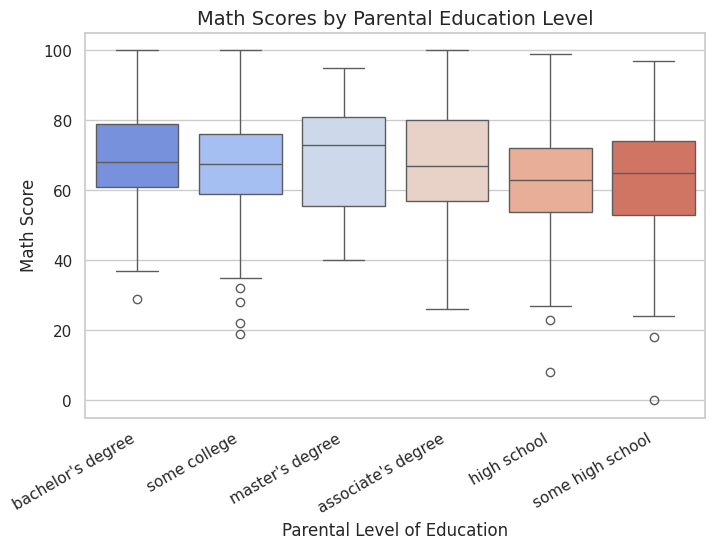

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create a boxplot for Math Scores by Parental Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(x="parental level of education", y="math score", data=df, palette="coolwarm")

plt.xlabel("Parental Level of Education", fontsize=12)
plt.ylabel("Math Score", fontsize=12)
plt.title("Math Scores by Parental Education Level", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.show()

A boxplot helps compare score distributions across groups (e.g., gender, parental education) by displaying medians, variability, and outliers. It also aids in detecting performance gaps and identifying students who may need extra support.









#Heatmap

In [ ]:
corr = df[["math score", "reading score", "writing score"]].corr()

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Between Subject Scores", fontsize=14)
plt.show()

KeyError: "None of [Index(['math score', 'reading score', 'writing score'], dtype='object')] are in the [columns]"

A heatmap makes it easier to identify correlations between different subjects, showing how strongly math, reading, and writing scores are related. It also helps in detecting patterns in student performance, revealing whether excelling in one subject influences scores in other



#Histogram

In [ ]:
sns.set(style="whitegrid")

# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["math score"], bins=20, kde=True, color="blue")
plt.title("Distribution of Math Scores", fontsize=14)
plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

KeyError: 'math score'

<Figure size 800x500 with 0 Axes>

This histogram shows the distribution of students' math scores. The KDE (Kernel Density Estimate) curve helps identify the spread and concentration of scores.



#Scatterplot

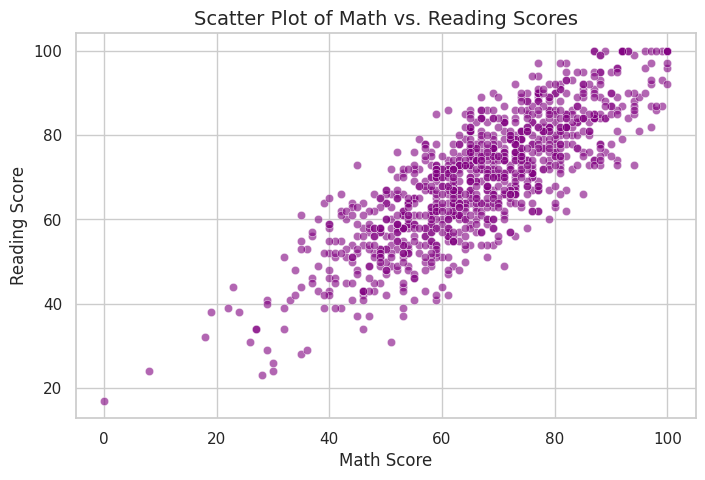

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["math score"], y=df["reading score"], color="purple", alpha=0.6)
plt.title("Scatter Plot of Math vs. Reading Scores", fontsize=14)
plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Reading Score", fontsize=12)
plt.show()


A scatterplot helps visualize the relationship between two numerical variables, like math and reading scores, revealing trends and correlations. It also aids in detecting outliers—students whose performance differs significantly from the norm.

#count plot

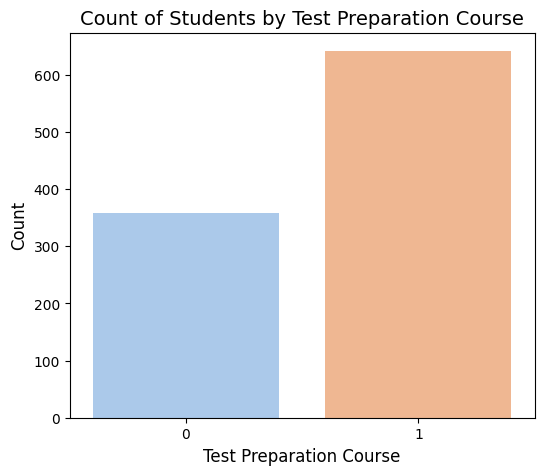

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/mnt/data/StudentsPerformance.csv")

# Create a boxplot for Math Scores by Parental Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(x="parental level of education", y="math score", data=df, palette="coolwarm")

plt.xlabel("Parental Level of Education", fontsize=12)
plt.ylabel("Math Score", fontsize=12)
plt.title("Math Scores by Parental Education Level", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.show()

A count plot helps visualize the distribution of categorical variables, like the number of students who completed a test preparation course. It also aids in comparing group sizes to detect imbalances or trends in the dataset.